### __Data Augemntation__ : 
- Is as technique that is used in Machine learning to artifically exapnd the size of datasets by applying some transformations or variations to existing datasets. Its widely used in Deep Learning to improve model generilization, reduce overfitting and make model more robust
- In the context of of tensorflow keras, data augmentation is especially useful in domains like:
    - __Computer Vision__: Augementing images with fils, rotations and cropping etc
    - __Natural Language processing__: Augmenting text with synonyms, paraphrasing, etc
    - __Time series/ Audio__: Adding Noise, shifting, e.t.c
- ImageDataGenerator was deprecated
- I will going to learn it using tf.keras

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, datasets, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [4]:
# Expand dimensions to include channel information
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

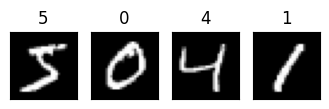

In [6]:
# Function to display some sample images
def plot_sample_images(images, labels):
    plt.figure(figsize=(4, 4))
    for i in range(4):
        plt.subplot(4, 4, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(labels[i])
    plt.show()
plot_sample_images(train_images, train_labels)

#### Lets apply data augmentation to above data

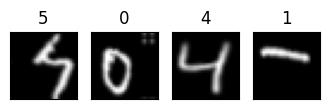

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomRotation(0.2), # Randomly Rotate the images in  +_ 20%
    layers.RandomZoom(0.2), # Randomly zooms in the images 20% in and out
    layers.RandomTranslation(0.2, 0.2) # Randomly Translates the images 20% in width and hieghts
])

# Visualize augmentated images
augmentated_images = [data_augmentation(train_images[i:i+1]).numpy() for i in range(4)]
augmentated_images = np.concatenate(augmentated_images, axis=0)
plot_sample_images(augmentated_images, train_labels[:4])